# Lab 5_1 Auto Encoder

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder Layers
        self.fc1 = nn.Linear(784, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 16)
        
        # Decoder Layers
        self.fc4 = nn.Linear(16, 64)
        self.relu3 = nn.ReLU()
        self.fc5 = nn.Linear(64, 256)
        self.relu4 = nn.ReLU()
        self.fc6 = nn.Linear(256, 784)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Encoder Forward Pass
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        
        # Decoder Forward Pass
        x = self.fc4(x)
        x = self.relu3(x)
        x = self.fc5(x)
        x = self.relu4(x)
        x = self.fc6(x)
        x = self.sigmoid(x)
        
        return x

In [3]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [ ]:
# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    for images, _ in train_loader:
        images = images.view(images.size(0), -1).to(device)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete.")

Epoch [1/10], Loss: 0.0246
Epoch [2/10], Loss: 0.0183
Epoch [3/10], Loss: 0.0187
Epoch [4/10], Loss: 0.0149
Epoch [5/10], Loss: 0.0118
Epoch [6/10], Loss: 0.0137
Epoch [7/10], Loss: 0.0124
Epoch [8/10], Loss: 0.0118
Epoch [9/10], Loss: 0.0101
Epoch [10/10], Loss: 0.0114
Training complete.


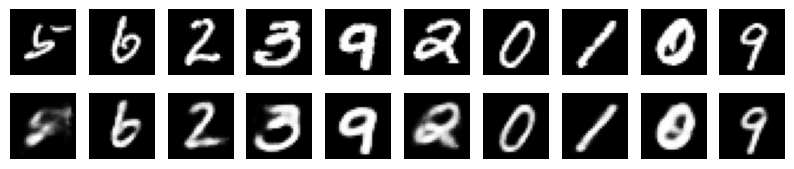

In [6]:
images, _ = next(iter(train_loader))
images = images.view(images.size(0), -1).to(device)
with torch.no_grad():
    reconstructed = autoencoder(images)

images = images.cpu().view(-1, 28, 28) 
reconstructed = reconstructed.cpu().view(-1, 28, 28)

fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(images[i], cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i], cmap='gray')
    axes[1, i].axis('off')
plt.show()